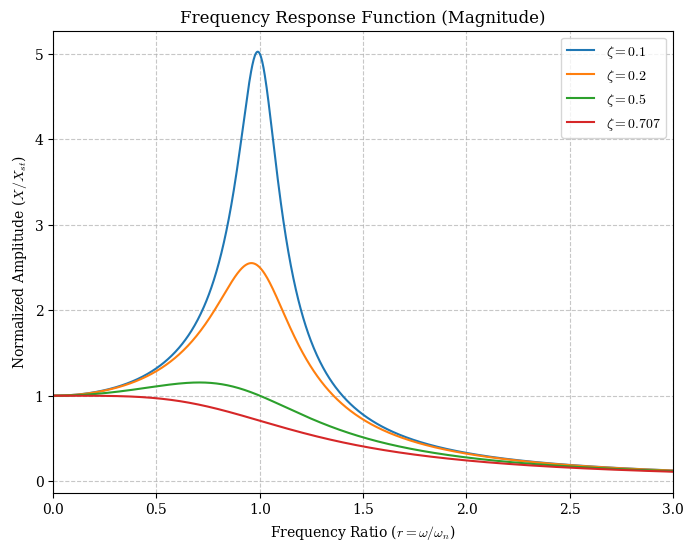

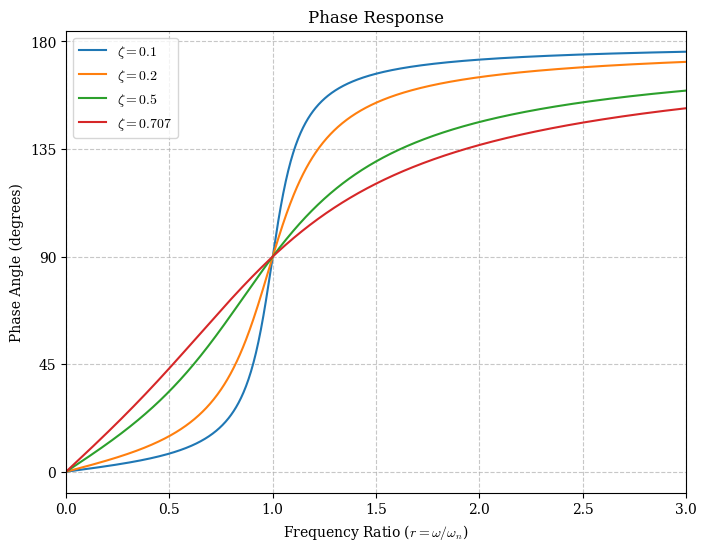

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define frequency ratio r = omega / omega_n
r = np.linspace(0, 3, 1000)

# Define damping ratios
zetas = [0.1, 0.2, 0.5, 0.707]

# Plot 1: Magnitude (FRF)
plt.figure(figsize=(8, 6))
for zeta in zetas:
    # Transmissibility / Magnification Factor calculation
    mag = 1 / np.sqrt((1 - r**2)**2 + (2 * zeta * r)**2)
    plt.plot(r, mag, label=f'$\zeta={zeta}$')

plt.title('Frequency Response Function (Magnitude)')
plt.ylabel('Normalized Amplitude ($X/X_{st}$)')
plt.xlabel('Frequency Ratio ($r = \omega / \omega_n$)')
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.legend()
plt.xlim(0, 3)
plt.savefig('frf_magnitude.png')
plt.show()
plt.close() # Close to start a new figure

# Plot 2: Phase Response
plt.figure(figsize=(8, 6))
for zeta in zetas:
    # Phase calculation (Lag)
    phase_rad = np.arctan2(2 * zeta * r, 1 - r**2)
    phase_deg = np.degrees(phase_rad)
    plt.plot(r, phase_deg, label=f'$\zeta={zeta}$')

plt.title('Phase Response')
plt.xlabel('Frequency Ratio ($r = \omega / \omega_n$)')
plt.ylabel('Phase Angle (degrees)')
plt.yticks([0, 45, 90, 135, 180])
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.xlim(0, 3)
plt.legend()
plt.show()
plt.savefig('frf_phase.png')
plt.close()

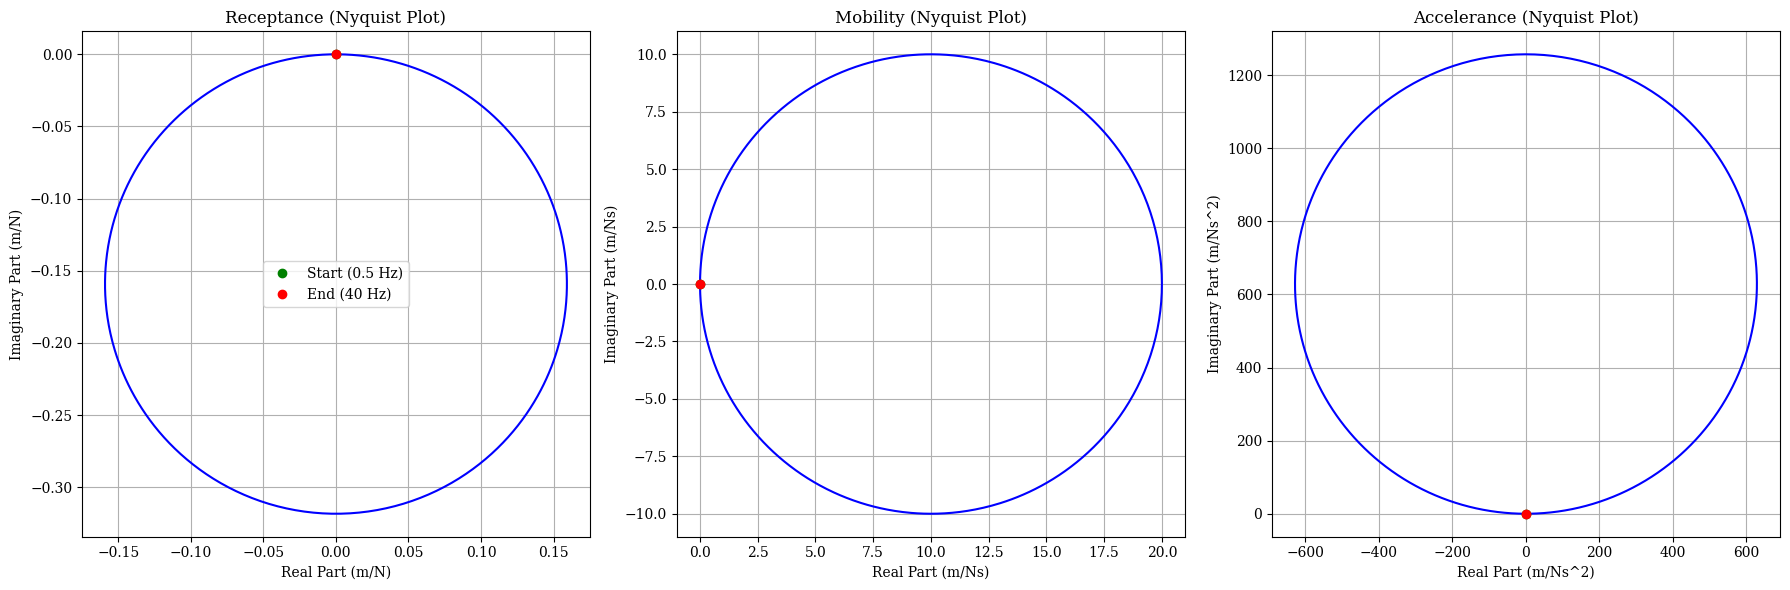

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# System Parameters
m = 1.0  # kg
fn = 10.0  # Hz
c = 0.05  # Ns/m

# Derived Parameters
wn = 2 * np.pi * fn  # rad/s
k = m * wn**2  # N/m

# Frequency Range
f_start = 0.5
f_end = 40.0
f = np.linspace(f_start, f_end, 1000000)
omega = 2 * np.pi * f

# Denominator (Dynamic Stiffness)
# D(w) = (k - mw^2) + i(cw)
D = (k - m * omega**2) + 1j * (c * omega)

# Frequency Response Functions
# Receptance (Displacement / Force)
alpha = 1.0 / D

# Mobility (Velocity / Force)
mobility = 1j * omega * alpha

# Accelerance (Acceleration / Force)
accelerance = -omega**2 * alpha

# Plotting
plt.figure(figsize=(18, 6))

# Receptance Plot
plt.subplot(1, 3, 1)
plt.plot(np.real(alpha), np.imag(alpha), 'b-')
plt.title('Receptance (Nyquist Plot)')
plt.xlabel('Real Part (m/N)')
plt.ylabel('Imaginary Part (m/N)')
plt.grid(True)
# Mark start and end points for direction
plt.plot(np.real(alpha[0]), np.imag(alpha[0]), 'go', label='Start (0.5 Hz)')
plt.plot(np.real(alpha[-1]), np.imag(alpha[-1]), 'ro', label='End (40 Hz)')
plt.legend()

# Mobility Plot
plt.subplot(1, 3, 2)
plt.plot(np.real(mobility), np.imag(mobility), 'b-')
plt.title('Mobility (Nyquist Plot)')
plt.xlabel('Real Part (m/Ns)')
plt.ylabel('Imaginary Part (m/Ns)')
plt.grid(True)
plt.plot(np.real(mobility[0]), np.imag(mobility[0]), 'go')
plt.plot(np.real(mobility[-1]), np.imag(mobility[-1]), 'ro')


# Accelerance Plot
plt.subplot(1, 3, 3)
plt.plot(np.real(accelerance), np.imag(accelerance), 'b-')
plt.title('Accelerance (Nyquist Plot)')
plt.xlabel('Real Part (m/Ns^2)')
plt.ylabel('Imaginary Part (m/Ns^2)')
plt.grid(True)
plt.plot(np.real(accelerance[0]), np.imag(accelerance[0]), 'go')
plt.plot(np.real(accelerance[-1]), np.imag(accelerance[-1]), 'ro')

plt.tight_layout()
plt.savefig('nyquist_plots.png')

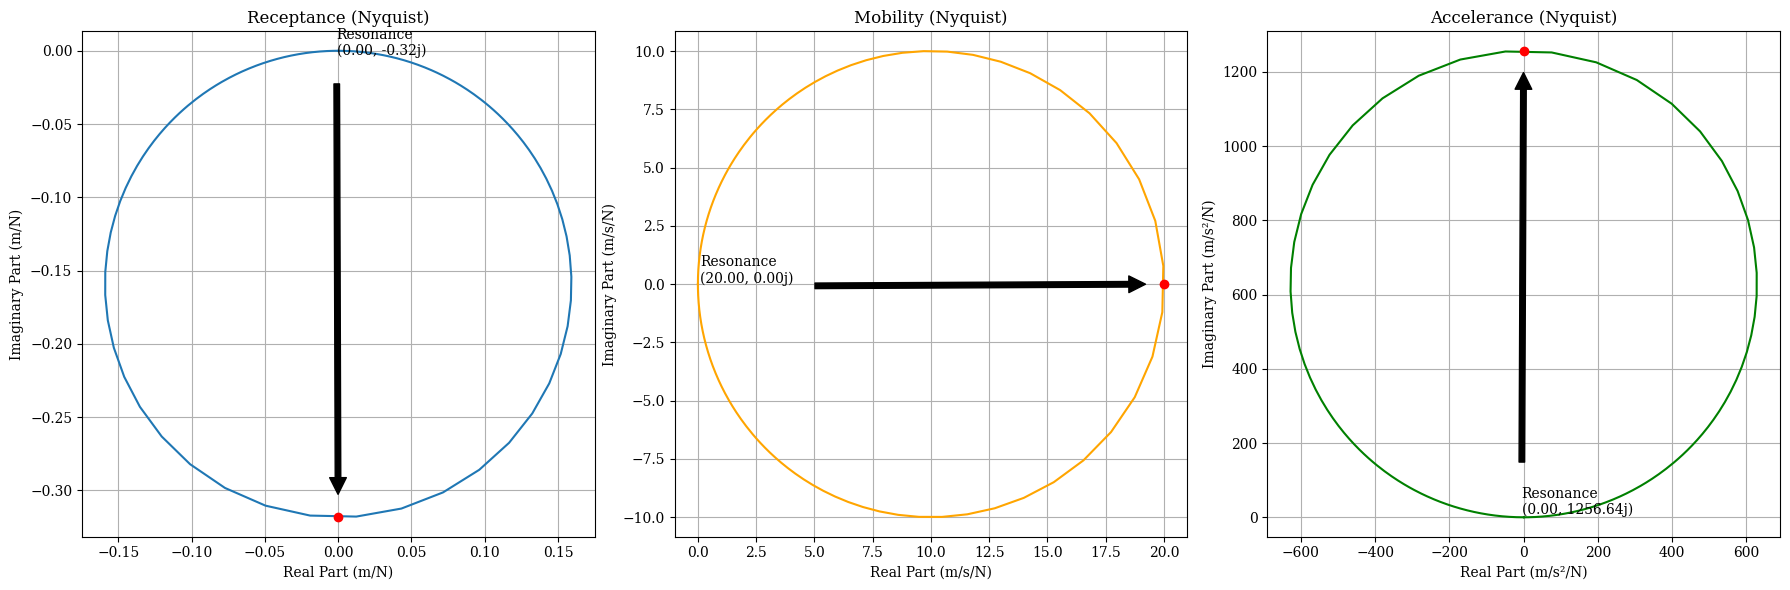

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# System Parameters
m = 1.0  # kg
fn = 10.0  # Hz
zeta = 0.05
wn = 2 * np.pi * fn  # rad/s
k = m * wn**2  # N/m
c = 0.05 
# Frequency Range for the curve
f = np.linspace(0.5, 40, 100000)
w = 2 * np.pi * f

# Calculate FRFs for the range
alpha = 1 / (k - m * w**2 + 1j * c * w)
Y = 1j * w * alpha
A = -w**2 * alpha

# Calculate FRFs specifically at Natural Frequency
w_n_point = wn
alpha_n = 1 / (k - m * w_n_point**2 + 1j * c * w_n_point)
Y_n = 1j * w_n_point * alpha_n
A_n = -w_n_point**2 * alpha_n

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Receptance Plot
axs[0].plot(np.real(alpha), np.imag(alpha), label='Receptance Path')
axs[0].scatter(np.real(alpha_n), np.imag(alpha_n), color='red', zorder=5, label='Natural Freq')
axs[0].annotate(f'Resonance\n({np.real(alpha_n):.2f}, {np.imag(alpha_n):.2f}j)',
                xy=(np.real(alpha_n), np.imag(alpha_n)), xytext=(-0.001, -0.003),
                arrowprops=dict(facecolor='black', shrink=0.05))
axs[0].set_title('Receptance (Nyquist)')
axs[0].set_xlabel('Real Part (m/N)')
axs[0].set_ylabel('Imaginary Part (m/N)')
axs[0].grid(True)
axs[0].axis('equal')

# Mobility Plot
axs[1].plot(np.real(Y), np.imag(Y), color='orange', label='Mobility Path')
axs[1].scatter(np.real(Y_n), np.imag(Y_n), color='red', zorder=5, label='Natural Freq')
axs[1].annotate(f'Resonance\n({np.real(Y_n):.2f}, {np.imag(Y_n):.2f}j)',
                xy=(np.real(Y_n), np.imag(Y_n)), xytext=(0.1, 0.05),
                arrowprops=dict(facecolor='black', shrink=0.05))
axs[1].set_title('Mobility (Nyquist)')
axs[1].set_xlabel('Real Part (m/s/N)')
axs[1].set_ylabel('Imaginary Part (m/s/N)')
axs[1].grid(True)
axs[1].axis('equal')

# Accelerance Plot
axs[2].plot(np.real(A), np.imag(A), color='green', label='Accelerance Path')
axs[2].scatter(np.real(A_n), np.imag(A_n), color='red', zorder=5, label='Natural Freq')
axs[2].annotate(f'Resonance\n({np.real(A_n):.2f}, {np.imag(A_n):.2f}j)',
                xy=(np.real(A_n), np.imag(A_n)), xytext=(-5, 8),
                arrowprops=dict(facecolor='black', shrink=0.05))
axs[2].set_title('Accelerance (Nyquist)')
axs[2].set_xlabel('Real Part (m/s²/N)')
axs[2].set_ylabel('Imaginary Part (m/s²/N)')
axs[2].grid(True)
axs[2].axis('equal')

plt.tight_layout()
plt.savefig('nyquist_plots_resonance.png')

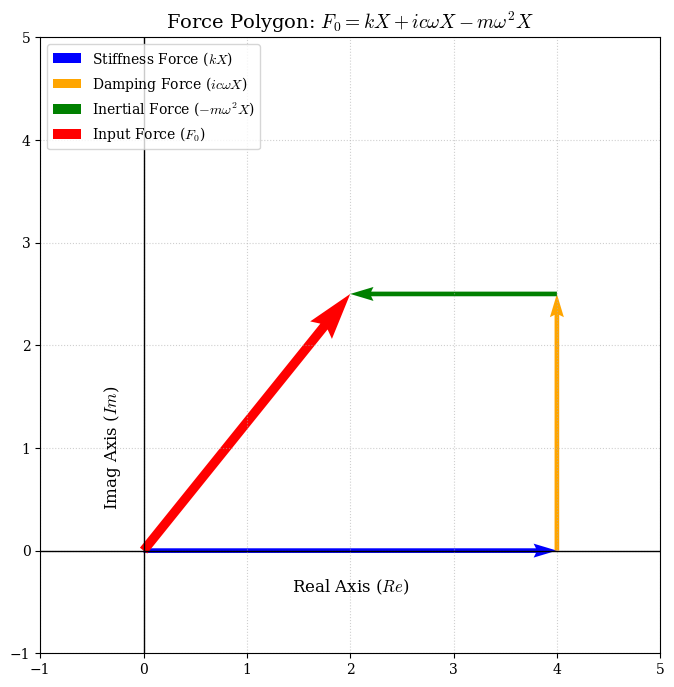

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Configure fonts to look like LaTeX
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['mathtext.fontset'] = 'cm'

# Parameters for the visualization
kX = 4.0        # Stiffness Force
c_omega_X = 2.5 # Damping Force
m_omega2_X = 2.0 # Inertial Force

# Vectors: (x, y, u, v)
vectors = [
    (0, 0, kX, 0),             # Stiffness
    (kX, 0, 0, c_omega_X),     # Damping
    (kX, c_omega_X, -m_omega2_X, 0) # Inertia
]

# Resultant (Input Force)
F0_u = kX - m_omega2_X
F0_v = c_omega_X
F0_vector = (0, 0, F0_u, F0_v)

plt.figure(figsize=(8, 8))
ax = plt.gca()

# Plot Components
ax.quiver(vectors[0][0], vectors[0][1], vectors[0][2], vectors[0][3], 
          angles='xy', scale_units='xy', scale=1, color='blue', label=r'Stiffness Force ($kX$)')

ax.quiver(vectors[1][0], vectors[1][1], vectors[1][2], vectors[1][3], 
          angles='xy', scale_units='xy', scale=1, color='orange', label=r'Damping Force ($ic\omega X$)')

ax.quiver(vectors[2][0], vectors[2][1], vectors[2][2], vectors[2][3], 
          angles='xy', scale_units='xy', scale=1, color='green', label=r'Inertial Force ($-m\omega^2 X$)')

# Plot Resultant - Solid line to avoid crash
ax.quiver(F0_vector[0], F0_vector[1], F0_vector[2], F0_vector[3], 
          angles='xy', scale_units='xy', scale=1, color='red', width=0.015, label=r'Input Force ($F_0$)')

# Axes & Grid
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid(True, linestyle=':', alpha=0.6)

# Labels with LaTeX formatting
plt.text(kX/2, -0.4, r'Real Axis ($Re$)', ha='center', fontsize=12)
plt.text(-0.4, 1, r'Imag Axis ($Im$)', va='center', rotation=90, fontsize=12)
plt.title(r'Force Polygon: $F_0 = kX + ic\omega X - m\omega^2 X$', fontsize=14)
plt.legend(loc='upper left', fontsize=10)

plt.savefig('complex_force_latex.png')